In [1]:
import numpy as np
import grid_world_class as gw
import riverswim_class as rs 
import riverswim_class_smdp as rs_s 

import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import e_greedy as egreed  
import experiment_utils as utils
import importlib
importlib.reload(gw)
importlib.reload(rs)
importlib.reload(rs_s)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(egreed)
importlib.reload(utils)
import matplotlib.pyplot as plt

GridWorld

In [7]:
# Npte we use input deltas such that the statements hold with probability delta=0.05

env_smdp = gw.grid_world(nS=10**2, T_max=2)
env_ucrl = gw.grid_world(nS=10**2, T_max=1)
#ucrl_naive = ucrl.UCRL2_L(nS=36, nA = 4, delta = 0.05/4)
#smdp_ucrl = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)
# propose new confidence sets.
#smdp_ucrl_l = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=1)
# propose new Brunskill-confidence sets.
#smdp_ucrl_b = ucrlS.UCRL_SMDP(nS = 36, nA = 4, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=2)

#Bus_ucrl = ucrlS.BUS(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6]),imprv=0)
#Bus2_ucrl = ucrlS.BUS2(nS = 36, nA = 4, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6]),imprv=0)

#epsilon_smdp = egreed.GREEDY(nS = 36, nA = 4)
print(utils.VI(env_smdp))
print(utils.VI(env_ucrl))



(41, array([2.4092819 , 2.51396327, 2.61775952, 2.72244956, 2.82443829,
       2.93106301, 3.02789721, 3.14409973, 3.22158032, 3.37678274,
       2.51396327, 2.6183641 , 2.72184498, 2.82625345, 2.92803725,
       3.03455964, 3.13137455, 3.24765517, 3.32521044, 3.48059218,
       2.61775952, 2.72184498, 2.82504286, 2.92924784, 3.03092297,
       3.1374373 , 3.2343055 , 3.35070789, 3.42835503, 3.58389208,
       2.72244956, 2.82625345, 2.92924784, 3.03334905, 3.13501122,
       3.24159242, 3.33856012, 3.45509474, 3.53282933, 3.68847278,
       2.82443829, 2.92803725, 3.03092297, 3.13501122, 3.23673158,
       3.34342096, 3.4405028 , 3.55715237, 3.63495482, 3.79064949,
       2.93106301, 3.03455964, 3.1374373 , 3.24159242, 3.34342096,
       3.45023389, 3.54742127, 3.66414974, 3.74199074, 3.89768004,
       3.02789721, 3.13137455, 3.2343055 , 3.33856012, 3.4405028 ,
       3.54742127, 3.64468592, 3.76145457, 3.83930823, 3.99495982,
       3.14409973, 3.24765517, 3.35070789, 3.45509474, 3.

In [232]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**5)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**5)
reward_sucrl_l,tau_sucrl_l = utils.run_experiment(env_smdp, smdp_ucrl_l, T = 10**5)
reward_sucrl_b,tau_sucrl_b = utils.run_experiment(env_smdp, smdp_ucrl_b, T = 10**5)

In [233]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**5)

reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 10**5)


In [234]:
print(np.mean(reward_sucrl),
np.mean(reward_ucrl),
np.mean(reward_bus),
np.mean(reward_bus2)
)

0.01004 0.06418 0.00852 0.00965


In [235]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_l = utils.calc_regret(reward=reward_sucrl_l, tau = tau_sucrl_l, optimal_gain=gstar)
regret_sucrl_b = utils.calc_regret(reward=reward_sucrl_b, tau = tau_sucrl_b, optimal_gain=gstar)


In [236]:
regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)


In [237]:
reward_eps,tau_eps = utils.run_experiment(env_smdp, epsilon_smdp, T = 10**5)
regrets_eps = utils.calc_regret(reward=reward_eps, tau = tau_eps, optimal_gain=gstar)

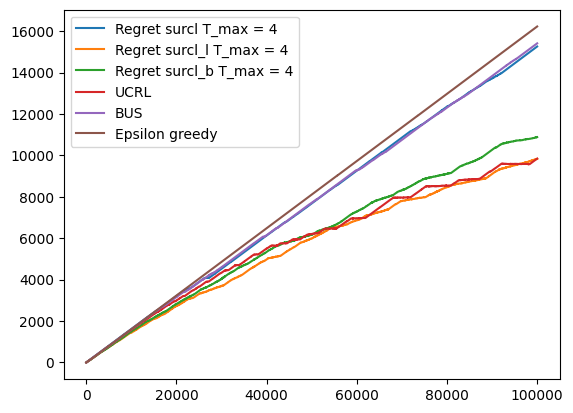

In [238]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")
plt.plot(regret_sucrl_l, label = "Regret surcl_l T_max = 4")
plt.plot(regret_sucrl_b, label = "Regret surcl_b T_max = 4")



plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_eps, label = "Epsilon greedy")

plt.legend()

In [249]:
# Sanity check

env_ucrl = rs.riverswim(nS=20, T_max=1)
ucrl_naive = ucrl.UCRL2_L(nS=20, nA = 2, delta = 0.05/4)

env_smdp1 = rs.riverswim(nS=20, T_max=1)
smdp_ucrl1 = ucrlS.UCRL_SMDP(nS = 20, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 1,imprv=0)

env_smdp2 = rs.riverswim(nS=20, T_max=2)
smdp_ucrl2 = ucrlS.UCRL_SMDP(nS = 20, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 2,imprv=0)

env_smdp3 = rs.riverswim(nS=20, T_max=3)
smdp_ucrl3 = ucrlS.UCRL_SMDP(nS = 20, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 3,imprv=0)

env_smdp4 = rs.riverswim(nS=20, T_max=4)
smdp_ucrl4 = ucrlS.UCRL_SMDP(nS = 20, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)

env_smdp5 = rs.riverswim(nS=20, T_max=5)
smdp_ucrl5 = ucrlS.UCRL_SMDP(nS = 20, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 5,imprv=0)

env_smdp6 = rs.riverswim(nS=20, T_max=6)
smdp_ucrl6 = ucrlS.UCRL_SMDP(nS = 20, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 6,imprv=0)

_,_,_,gstar = utils.VI(env_ucrl)



(108, array([22.90642803, 24.20028025, 25.65675026, 27.13423112, 28.61475143,
       30.09587976, 31.57720364, 33.05861213, 34.54006034, 36.02152714,
       37.50300237, 38.9844813 , 40.46596178, 41.94744289, 43.42892424,
       44.91040568, 46.39188715, 47.87336863, 49.35485011, 50.83633159]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 0.4662267333949739) (131, array([33.64336313, 34.9364277 , 36.39209983, 37.86891837, 39.34894273,
       40.82972829, 42.31083086, 43.79210487, 45.27347587, 46.75490069,
       48.23635433, 49.71782276, 51.19929843, 52.68077747, 54.16225799,
       55.64373913, 57.1252205 , 58.60670195, 60.08818342, 61.5696649 ]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 0.4661894546961811)


In [247]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**5)
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)


reward_sucrl2,tau_sucrl2 = utils.run_experiment(env_smdp2, smdp_ucrl2, T =  10**5)
regret_sucrl2 = utils.calc_regret(reward=reward_sucrl2, tau = tau_sucrl2, optimal_gain=gstar)

reward_sucrl3,tau_sucrl3 = utils.run_experiment(env_smdp3, smdp_ucrl3, T =  10**5)
regret_sucrl3 = utils.calc_regret(reward=reward_sucrl3, tau = tau_sucrl3, optimal_gain=gstar)

reward_sucrl4,tau_sucrl4 = utils.run_experiment(env_smdp4, smdp_ucrl4, T =  10**5)
regret_sucrl4 = utils.calc_regret(reward=reward_sucrl4, tau = tau_sucrl4, optimal_gain=gstar)

reward_sucrl5,tau_sucrl5 = utils.run_experiment(env_smdp5, smdp_ucrl5, T =  10**5)
regret_sucrl5 = utils.calc_regret(reward=reward_sucrl5, tau = tau_sucrl5, optimal_gain=gstar)

reward_sucrl6,tau_sucrl6 = utils.run_experiment(env_smdp6, smdp_ucrl6, T =  10**5)
regret_sucrl6 = utils.calc_regret(reward=reward_sucrl6, tau = tau_sucrl6, optimal_gain=gstar)



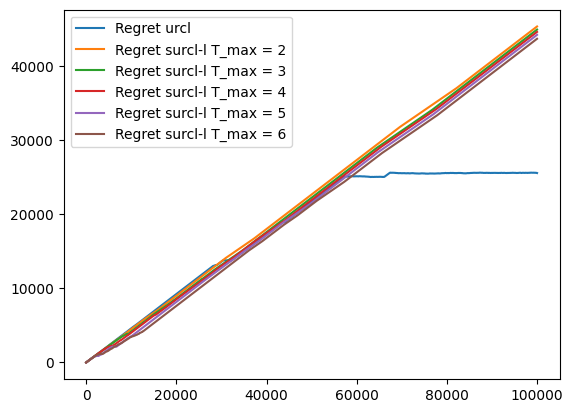

In [248]:
plt.plot(regret_ucrl, label = "Regret urcl")

plt.plot(regret_sucrl2, label = "Regret surcl-l T_max = 2")
plt.plot(regret_sucrl3, label = "Regret surcl-l T_max = 3")
plt.plot(regret_sucrl4, label = "Regret surcl-l T_max = 4")
plt.plot(regret_sucrl5, label = "Regret surcl-l T_max = 5")
plt.plot(regret_sucrl6, label = "Regret surcl-l T_max = 6")


plt.legend()

0.008333333333333333

RiverSwim

In [140]:
env_smdp = rs.riverswim(nS=10, T_max=4)
env_ucrl = rs.riverswim(nS=10, T_max=1)
ucrl_naive = ucrl.UCRL2_L(nS=10, nA = 2, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=0)
# propose new confidence sets.
smdp_ucrl_l = ucrlS.UCRL_SMDP(nS = 10, nA = 2, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=1)
# propose new Brunskill-confidence sets.
smdp_ucrl_b = ucrlS.UCRL_SMDP(nS = 10, nA = 2, delta = 0.05/6, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 4,imprv=2)

Bus_ucrl = ucrlS.BUS(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,8,16,20]),imprv=0)
Bus2_ucrl = ucrlS.BUS2(nS = 10, nA = 2, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,8,16,20]),imprv=0)

epsilon_smdp = egreed.GREEDY(nS = 10, nA = 2)
_,_,_,gstar = utils.VI(env_ucrl)

print('VI',utils.VI(env_ucrl)) 
print('PI',utils.PI(env_ucrl))# test of policy iteration in average reward MDPs
print('PI on equivalent MDP',utils.PI(env_smdp))# test of policy iteration in average reward MDPs
print('PI SMDP',utils.PI_SMDP(env_smdp))# test of policy iteration in average reward for SMDPs
print('Relationship of MDP and SMDP(i.e. tau)', utils.PI(env_smdp)[1]/utils.PI_SMDP(env_smdp)[1])
1/0.9 # note they are the same!!!

VI (62, array([16.25394369, 17.5475902 , 19.00411458, 20.48180411, 21.96254317,
       23.4438365 , 24.92526481, 26.40673206, 27.8882105 , 29.36969174]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 0.466189749384883)
PI (9, array([ 0.        ,  1.2962963 ,  2.75462964,  4.23321761,  5.71433741,
        7.19577368,  8.67724952, 10.1587303 , 11.6402117 , 13.12169318]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 0.4666666685210334)
PI on equivalent MDP (4, array([ 0.        ,  1.2962963 ,  2.75462964,  4.23321761,  5.71433741,
        7.19577368,  8.67724952, 10.1587303 , 11.6402117 , 13.12169318]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 0.46666666852103333)
PI SMDP (2, array([ 0.        ,  1.16666667,  2.47916668,  3.80989585,  5.14290367,
        6.47619631,  7.80952457,  9.14285727, 10.47619053, 11.80952386]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 0.4666666685210684)
Relationship of MDP and SMDP(i.e. tau) [       nan 1.11111111 1.11111111 1.11111111 1.11111111 1.11111111
 1.11111111 1.11111111

C:\Users\andre\AppData\Local\Temp\ipykernel_9896\2386464870.py:20: RuntimeWarning: invalid value encountered in divide
  print('Relationship of MDP and SMDP(i.e. tau)', utils.PI(env_smdp)[1]/utils.PI_SMDP(env_smdp)[1])


1.1111111111111112

In [141]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 2*10**6)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 2*10**6)
reward_sucrl_l,tau_sucrl_l = utils.run_experiment(env_smdp, smdp_ucrl_l, T = 2*10**6)
reward_sucrl_b,tau_sucrl_b = utils.run_experiment(env_smdp, smdp_ucrl_b, T = 2*10**6)


KeyboardInterrupt: 

In [ ]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 2*10**6)


In [ ]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 2*10**6)
reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 2*10**6)


In [ ]:
reward_eps,tau_eps = utils.run_experiment(env_smdp, epsilon_smdp, T = 2*10**6)
regrets_eps = utils.calc_regret(reward=reward_eps, tau = tau_eps, optimal_gain=gstar)


No convergence in VI after:  100  steps!
No convergence in VI after:  100  steps!


In [ ]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_l = utils.calc_regret(reward=reward_sucrl_l, tau = tau_sucrl_l, optimal_gain=gstar)
regret_sucrl_b = utils.calc_regret(reward=reward_sucrl_b, tau = tau_sucrl_b, optimal_gain=gstar)

regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)
regrets_eps = utils.calc_regret(reward=reward_eps, tau = tau_eps, optimal_gain=gstar)


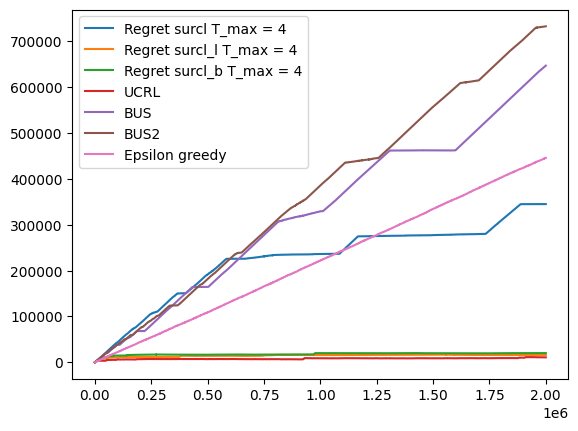

In [ ]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 4")
plt.plot(regret_sucrl_l, label = "Regret surcl_l T_max = 4")
plt.plot(regret_sucrl_b, label = "Regret surcl_b T_max = 4")



plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")

plt.plot(regrets_bus2, label = "BUS2")
plt.plot(regrets_eps, label = "Epsilon greedy")

plt.legend()

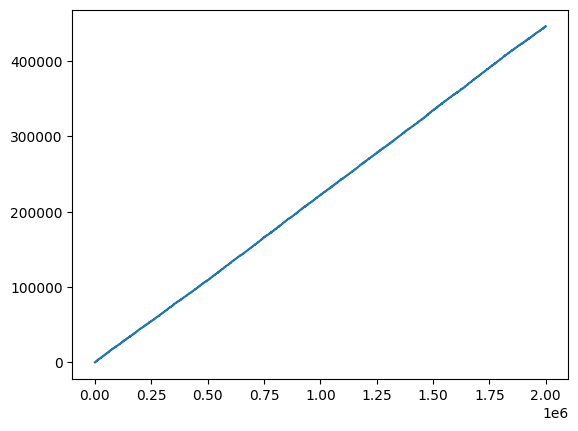

In [ ]:
plt.plot(regrets_eps, label = "Epsilon greedy")


In [ ]:
print("Probs, BUS",Bus_ucrl.current_sample_prop , "Probs, BUS2", Bus2_ucrl.current_sample_prop)
#Bus_ucrl.n_episodes
print(Bus_ucrl.loss_grid)
print(epsilon_smdp.hatR_eq,epsilon_smdp.hatR)

Probs, BUS [0.03729749 0.57013449 0.33848896 0.05407906] Probs, BUS2 [0.15771604 0.50370769 0.3190237  0.01955257]
[113.85497398  66.16448622  75.28270984 107.35758905]
[[0.04980545 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.25941752]
 [0.         0.73173876]] [[0.05       0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.64934715]
 [0.         1.83248825]]
